In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Disease

/content/drive/MyDrive/Colab Notebooks/Disease


# Imports

In [3]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC

# Preprocessing

In [ ]:
df = pd.read_csv('train.csv')

# total 4 classes, leave only original data
df.loc[df['timestamp(day)'].isin([-5, -4]), 'timestamp(day)'] = -3
df= df[df['original'] == 1]

# df array of each patient
df_array = []

# one df by one patient, make and df_array
group_start_index = 0
for i, row in df.iterrows():
    if row['timestamp(hr)'] == 0 and row['timestamp(day)'] == 0:
        group_df = df[group_start_index:i+1].copy()
        df_array.append(group_df)
        group_start_index = i+1

#imputation: fill NaN values using mean value
for df_patient in df_array:
  df_patient.fillna(df_patient.mean(), inplace=True)

# Combine patient dataframes
df_combined = pd.concat(df_array)
df_combined.fillna(df_combined.mean(), inplace=True) # imputation with values still with NaN

# Extract label column
labels = df_combined['timestamp(day)']

# Perform SMOTE to address data imbalance
smote = SMOTE()
df_combined_resampled, labels_resampled = smote.fit_resample(df_combined.drop('timestamp(day)', axis=1), labels)

# Create a new dataframe with resampled data
df_resampled = pd.DataFrame(df_combined_resampled, columns=df_combined.drop('timestamp(day)', axis=1).columns)
df_resampled['timestamp(day)'] = labels_resampled 

# 특성과 레이블 추출
X = df.drop('timestamp(day)', axis=1)
y = df['timestamp(day)']

# SVM 모델 정의
svm_model = SVC()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_model, X, y, cv=kfold)

# 교차 검증 결과 출력
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))


# EDA


Label Mean: -1.5
Label Median: -1.5
           1         2         3         4         5         6         7  \
1   1.000000  0.010736  0.028289  0.001934  0.001971  0.048502 -0.001586   
2   0.010736  1.000000 -0.150549  0.056977 -0.088593 -0.011187 -0.008258   
3   0.028289 -0.150549  1.000000  0.404604  0.080985 -0.013547  0.008936   
4   0.001934  0.056977  0.404604  1.000000 -0.047999  0.007020 -0.000582   
5   0.001971 -0.088593  0.080985 -0.047999  1.000000  0.175723  0.014330   
6   0.048502 -0.011187 -0.013547  0.007020  0.175723  1.000000  0.003011   
7  -0.001586 -0.008258  0.008936 -0.000582  0.014330  0.003011  1.000000   
8  -0.014635  0.027300 -0.025297 -0.007225  0.022140  0.021937 -0.003951   
9  -0.007359 -0.038940  0.000214 -0.019675  0.046566  0.021792  0.001252   
10  0.026200  0.017426 -0.019641  0.017780  0.059046  0.037534  0.003830   
11  0.013781 -0.029750 -0.029378 -0.030699  0.082654  0.057862 -0.001686   
12  0.007195 -0.035683 -0.034763 -0.033666  0.090530

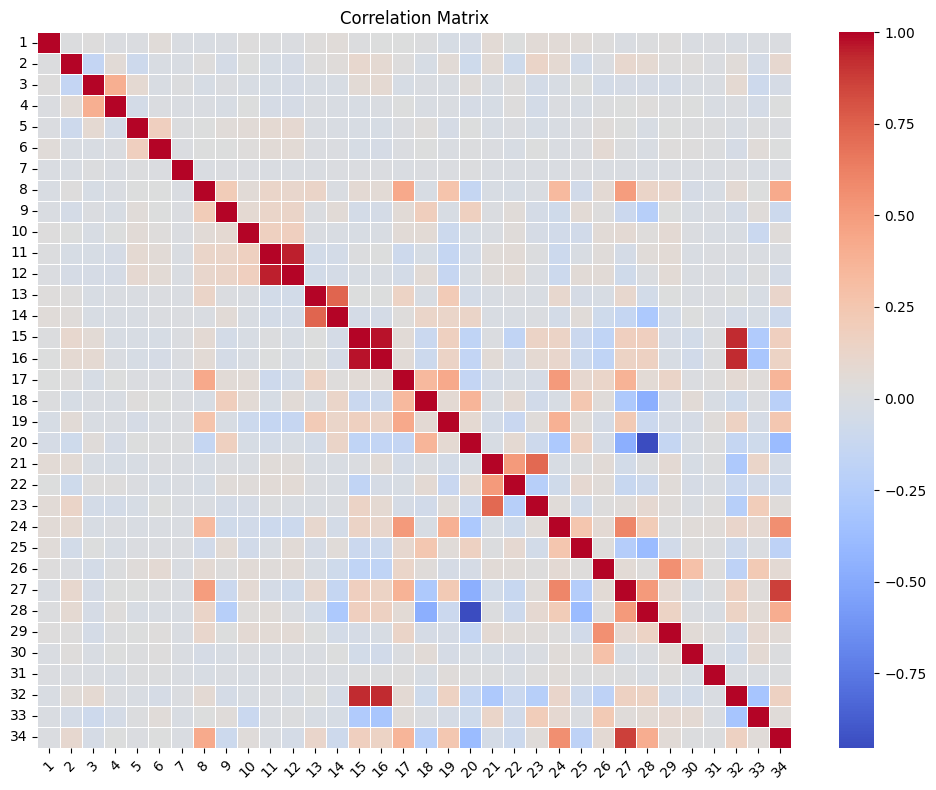

In [9]:
# 1) How many patients are there?
num_patients = len(df_array)

# 2) What are the mean and median value of the label (day)?
label_mean = df_resampled['timestamp(day)'].mean()
label_median = df_resampled['timestamp(day)'].median()

print("Label Mean:", label_mean)
print("Label Median:", label_median)

# 3) Perform EDA and calculate the statistics of the dataset: mean, std, correlations among features, etc.
#    (e.g.There are 34 features and you have to find the correlations among each feature (34 by 34 correlation matrix)).

pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.width', None)  # 출력 너비 설정

selected_columns = [str(i) for i in range(1, 35)]
correlation_matrix = df_resampled[selected_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('correlation_matrix.png')
plt.show()



# 4) Explain the key insight from your observation above.


# 5) Perform feature engineering/selection/importance (you may remove no more than 5 features).
#    You can employ any well-known feature engineering methods (PCA, clustering, etc.).
#    Justify your choices and processes.

# 11,12 / 15, 16, 32 / 27, 34 뒤에꺼를 제거하면 총 4개 제거할 수 있음



# Model Selection



# Model Tuning



# Model Evaluation / Metrics